# Chi-Square Test of Independence

The Chi-square test of independence tests if two categorical variables are independent.

Recall that we can summarize two categorical variables within a two-way table, also called a r × c contingency table, where r = number of rows, c = number of columns. Our question of interest is "Are the two variables independent?" This question is set up using the following hypothesis statements:

**Null Hypothesis**: The two categorical variables are independent.

**Alternative Hypothesis**: The two categorical variables are dependent.

The chi-square test statistic is calculated by using the formula:

$$\chi^2 = \sum \dfrac {(O-E)^2} {E}$$

where $O$ represents the observed frequency. $E$ is the expected frequency under the null hypothesis and computed by:

$$ E = \dfrac {row \space total \times column \space total} {sample \space size}$$

We will calculate the P-value of the chi-square test statistic from a $\chi^2$ distribution with degree of freedom $(r - 1) * (c - 1)$. We will fail to reject the null hypothesis if the P-value is greater than the specified significance level.

# Example

Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table:

In [15]:
import pandas as pd
import numpy as np
%pylab inline
pylab.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [16]:
gender_data = pd.DataFrame(data=[[60, 54, 46, 41], 
                                 [40, 44, 53, 57]],
                          index=['female', 'male'],
                          columns=['High School', 'Bachelors', 'Masters', 'Ph.d.'])

In [17]:
gender_data

,High School,Bachelors,Masters,Ph.d.
female,60,54,46,41
male,40,44,53,57


## Visualizing the Data

In [18]:
gender_long = pd.melt(gender_data.reset_index(), 
                      id_vars='index', 
                      var_name='education', 
                      value_name='n_samples').rename(columns={'index': 'gender'})

In [19]:
gender_long

,gender,education,n_samples
0,female,High School,60
1,male,High School,40
2,female,Bachelors,54
3,male,Bachelors,44
4,female,Masters,46
5,male,Masters,53
6,female,Ph.d.,41
7,male,Ph.d.,57


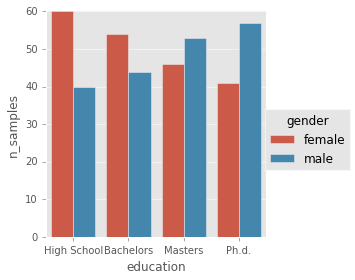

In [20]:
g = sns.factorplot(kind='bar', x='education', y='n_samples', hue="gender", data=gender_long)

## Calculate Totals

In [21]:
row_totals = gender_data.sum(axis=1)
row_totals

female    201
male      194
dtype: int64

In [22]:
column_totals = gender_data.sum(axis=0)
column_totals.to_frame().T

,High School,Bachelors,Masters,Ph.d.
0,100,98,99,98


## Calculate Expected Frequencies

In [23]:
expected_frequencies = pd.concat(
    {c: row_totals for c in gender_data.columns}, 
    axis=1).mul(column_totals).div(gender_data.sum(axis=1).sum())

In [24]:
expected_frequencies

,Bachelors,High School,Masters,Ph.d.
female,49.868354,50.886076,50.377215,49.868354
male,48.131646,49.113924,48.622785,48.131646


# Calculate Chi-Square test statistic

In [25]:
t_stat = gender_data.sub(
    expected_frequencies).pow(2.0).div(
    expected_frequencies).sum(axis=1).sum()

In [26]:
t_stat

8.006066246262538

In [27]:
df = (gender_data.shape[0]-1) * (gender_data.shape[1]-1)
df

3

In [28]:
from scipy.stats import chi2
chi2_dist = chi2(df=df)
p_val = chi2_dist.sf(t_stat)

sig_level = 0.05
print('P-val of chi^2 test at significance level {:.2f} is {:.4f}'.format(sig_level, p_val))

P-val of chi^2 test at significance level 0.05 is 0.0459


Since the P-val is less than the significance level, we will reject the null hypothesis, so we conclude that the two categorical variables are dependent. Education level is dependent on gender at 5% significance level.